In [147]:
'''Asssignment 02'''
''' Name: Mayisha Farzana 
    ID: 160204028'''


' Name: Mayisha Farzana \n    ID: 160204028'

[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 2.   2.5  2. ]
 [ 0.   2.   2. ]
 [ 2.   3.   2. ]
 [ 4.   5.   1. ]]
6
x =  1.0 y =  1.0 class =  1.0
x =  1.0 y =  -1.0 class =  1.0
x =  2.0 y =  2.5 class =  2.0
x =  0.0 y =  2.0 class =  2.0
x =  2.0 y =  3.0 class =  2.0
x =  4.0 y =  5.0 class =  1.0
[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 4.  5.  1.]]
[[2.  2.5 2. ]
 [0.  2.  2. ]
 [2.  3.  2. ]]
3
3
[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 4.  5.  1.]]
[[2.  2.5 2. ]
 [0.  2.  2. ]
 [2.  3.  2. ]]


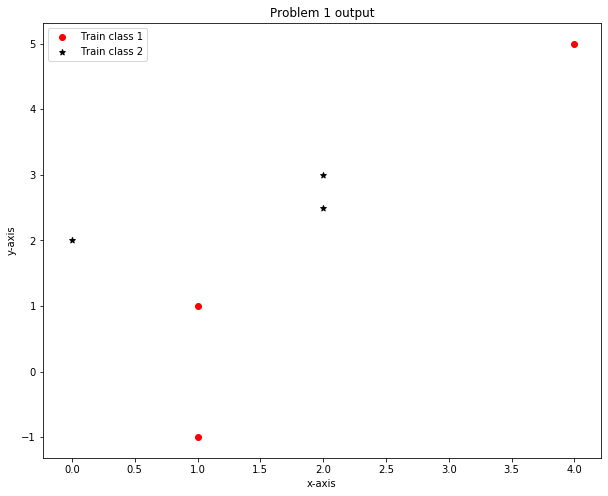

In [148]:
'''Problem 1 '''
import numpy as np
import matplotlib.pyplot as plt
ar=np.loadtxt('train-perceptron.txt',dtype='float64')#loading the train and test data
print(ar)
s=len(ar)
print(s)
for x in  ar:
    print("x = ",x[0],"y = ",x[1],"class = ",x[2]) #print the class names   
ar_clas1=np.array([row for row in ar if row[2]==1])
print(ar_clas1)
ar_clas2=np.array([row for row in ar if row[2]==2])
print(ar_clas2)    
x_train_1=ar_clas1[:,0]
y_train_1=ar_clas1[:,1]
x_train_2=ar_clas2[:,0]
y_train_2=ar_clas2[:,1]
class1_len=len(ar_clas1)
print(class1_len)
class2_len=len(ar_clas2)
print(class2_len)
ar_clas1=np.array([row for row in ar if row[2]==1])
print(ar_clas1)
ar_clas2=np.array([row for row in ar if row[2]==2])
print(ar_clas2)
fig,ax=plt.subplots()#to show it in the same figure
plt.title("Problem 1 output")
plt.xlabel('x-axis', color='black')
plt.ylabel('y-axis', color='black')
ax.scatter(x_train_1,y_train_1,marker='o',color='r',label='Train class 1')
ax.scatter(x_train_2,y_train_2,marker='*',color='black',label='Train class 2')
fig.set_figheight(8)
fig.set_figwidth(10)
ax.legend()#show the output figure

In [149]:
'''Problem 2'''
##########PHI FUNCTION###########
def get_phii(x1,x2):
    return np.array([x1*x1,x2*x2,x1*x2,x1,x2,1])
y=get_phii(2,3)
print(y)

[4 9 6 2 3 1]


In [95]:
hd_y=[]#taking one list and store the class value
#Storing the class values 
for row in ar_clas1:
    hd_y.append(get_phii(row[0],row[1]))
for row in ar_clas2:
     hd_y.append(np.dot(get_phii(row[0],row[1]),-1)) 
     #Normalization: Negating here all the values to classify it    
for x in hd_y:
    print(x)


[1. 1. 1. 1. 1. 1.]
[ 1.  1. -1.  1. -1.  1.]
[16. 25. 20.  4.  5.  1.]
[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
[ 0. -4.  0.  0. -2. -1.]
[-4. -9. -6. -2. -3. -1.]


In [150]:
#############  Batch Processing Function ####
w=np.zeros_like(hd_y[0])
def perceptron_many_at_a_time(learning_rate, w):
    for itr in range(1000000000):
        mc = False;#At first misclassify will be false that means the datas are misclassified
        sum_y = np.zeros_like(hd_y[0])
        for i in range(len(hd_y)):
            val = np.dot(hd_y[i], w)#multiply the y values with weight vector in matrix multiplication
            if (val <= 0.0):#Checking it if it is greater than zero whcih means it is correctly classified
                mc = True#misclassified is true that means we do not need to update it's weight vector
                sum_y = sum_y + hd_y[i]#the values which are misclassified we , adding the y values in here
        sum_y = sum_y * learning_rate# alpha*sum(y)
        w = w + sum_y#w=w+aplha*sum(y)
        if (mc == False):
            return itr + 1#if the datas are misclassified we need to do it again and we will count the iteration number
    return -1 #when there will be no misclassified values we will return -1 fa


In [151]:

#############  Single Processing Function ####
w=np.zeros_like(hd_y[0])
def perceptron_one_at_a_time(learning_rate, w):
    for itr in range(1000000000):
        mc = False;        
        for i in range(len(hd_y)):
            val = np.dot(hd_y[i], w)
            if (val <= 0.0):
                mc = True
                sum_y = np.zeros_like(hd_y[0])
                sum_y = sum_y + hd_y[i]
                sum_y = sum_y * learning_rate
                w = w + sum_y
        if (mc == False):
            return itr + 1
    return -1

In [118]:

w=np.zeros_like(hd_y[0])
print("Initial Weight Vector = All Zero")
print("Alpha(Learning Rate)"+"\t\t"+"One at a Time"+"\t\t"+'Many at a Time')
for learning_rate in np.arange(0.1,1.1,0.1):
    print("\t{:.2f}".format(learning_rate)+'\t\t\t\t'+str(perceptron_one_at_a_time(learning_rate,w))+ "\t\t\t" + str(perceptron_many_at_a_time(learning_rate, w)))

    

w=np.ones_like(hd_y[0])
print("Initial Weight Vector = All One")
print("Alpha(Learning Rate)"+"\t\t"+"One at a Time"+"\t\t"+'Many at a Time')
for learning_rate in np.arange(0.1,1.1,0.1):
    print("\t{:.2f}".format(learning_rate)+'\t\t\t\t'+str(perceptron_one_at_a_time(learning_rate,w))+ "\t\t\t" + str(perceptron_many_at_a_time(learning_rate, w)))

    
np.random.seed(1)
# weight vector zero
w = np.random.uniform(0, 1, len(hd_y[0]))
print("Initial Weight Vector = All Random")
print("Alpha(Learning Rate)"+"\t\t"+"One at a Time"+"\t\t"+'Many at a Time')
for learning_rate in np.arange(0.1, 1.1, 0.1):
    print("\t{:.2f}".format(learning_rate) + "\t\t\t\t" + str(perceptron_one_at_a_time(learning_rate, w))+ "\t\t\t" + str(perceptron_many_at_a_time(learning_rate, w)))
    

Initial Weight Vector = All Zero
Alpha(Learning Rate)		One at a Time		Many at a Time
	0.10				94			105
	0.20				94			105
	0.30				94			92
	0.40				94			105
	0.50				94			92
	0.60				94			105
	0.70				94			105
	0.80				94			105
	0.90				94			105
	1.00				94			92
Initial Weight Vector = All One
Alpha(Learning Rate)		One at a Time		Many at a Time
	0.10				6			102
	0.20				92			104
	0.30				104			91
	0.40				106			116
	0.50				93			105
	0.60				93			114
	0.70				108			91
	0.80				115			91
	0.90				94			105
	1.00				94			93
Initial Weight Vector = All Random
Alpha(Learning Rate)		One at a Time		Many at a Time
	0.10				109			125
	0.20				100			100
	0.30				94			126
	0.40				98			102
	0.50				98			115
	0.60				112			127
	0.70				109			101
	0.80				108			116
	0.90				108			116
	1.00				115			116


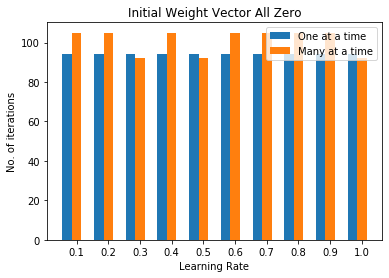

In [141]:
##############Bar Graph################
##############Weight Vector Zero###########
x_label = []
for x in np.arange(0.1, 1.1, 0.1):
    s = "{:.1f}".format(x)
    x_label.append(s)

one_at_a_time = []
w=np.zeros_like(hd_y[0])
tmp = []
for learning_rate in np.arange(0.1, 1.1, 0.1):
    a = perceptron_one_at_a_time(learning_rate, w)
    one_at_a_time.append(a)
many_at_a_time = []
for learning_rate in np.arange(0.1, 1.1, 0.1):
    b = perceptron_many_at_a_time(learning_rate, w)
    many_at_a_time.append(b)

bar_width = 0.3
index = np.arange(10)
plt.title('Initial Weight Vector All Zero')
plt.bar(index, one_at_a_time, bar_width,label='One at a time')
plt.bar(index + bar_width, many_at_a_time, bar_width, label='Many at a time')
plt.xlabel('Learning Rate')
plt.ylabel('No. of iterations')
plt.xticks(index + bar_width, x_label)
plt.legend()
plt.show()

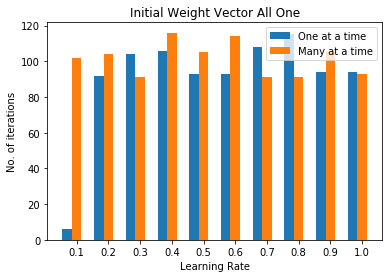

In [145]:
################Bar Graph############
#################Weight Vector One###############
x_label = []
for x in np.arange(0.1, 1.1, 0.1):
    s = "{:.1f}".format(x)
    x_label.append(s)

one_at_a_time = []
w=np.ones_like(hd_y[0])
tmp = []
for learning_rate in np.arange(0.1, 1.1, 0.1):
    a = perceptron_one_at_a_time(learning_rate, w)
    one_at_a_time.append(a)
many_at_a_time = []
for learning_rate in np.arange(0.1, 1.1, 0.1):
    b = perceptron_many_at_a_time(learning_rate, w)
    many_at_a_time.append(b)

bar_width = 0.3
index = np.arange(10)
plt.title('Initial Weight Vector All One')
plt.bar(index, one_at_a_time, bar_width,label='One at a time')
plt.bar(index + bar_width, many_at_a_time, bar_width, label='Many at a time')
plt.xlabel('Learning Rate')
plt.ylabel('No. of iterations')
plt.xticks(index + bar_width, x_label)
plt.legend()
plt.show()

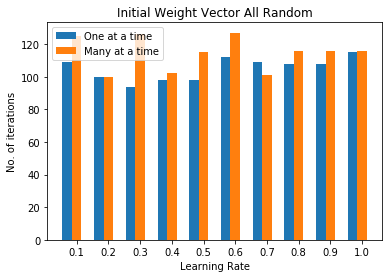

In [144]:
################Bar Graph############
#################Weight Vector Random###############

x_label = []
for x in np.arange(0.1, 1.1, 0.1):
    s = "{:.1f}".format(x)
    x_label.append(s)

one_at_a_time = []
np.random.seed(1)
w = np.random.uniform(0, 1, len(hd_y[0]))
tmp = []
for learning_rate in np.arange(0.1, 1.1, 0.1):
    a = perceptron_one_at_a_time(learning_rate, w)
    one_at_a_time.append(a)
many_at_a_time = []
for learning_rate in np.arange(0.1, 1.1, 0.1):
    b = perceptron_many_at_a_time(learning_rate, w)
    many_at_a_time.append(b)

bar_width = 0.3
index = np.arange(10)
plt.title('Initial Weight Vector All Random')
plt.bar(index, one_at_a_time, bar_width,label='One at a time')
plt.bar(index + bar_width, many_at_a_time, bar_width, label='Many at a time')
plt.xlabel('Learning Rate')
plt.ylabel('No. of iterations')
plt.xticks(index + bar_width, x_label)
plt.legend()
plt.show()
